In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scenario0

In [5]:
names=['Id', 'Iteration1', 'Iteration2', 'Iteration3', 'Iteration4', 'Iteration5', 'Iteration6', 'Iteration7', 'Iteration8', 'Iteration9']

In [36]:
speeds_df = pd.read_csv('Scenario0/speeds.dat', sep='\t',names=names)
densities_df = pd.read_csv('Scenario0/densities.dat', sep='\t',names=names)

In [34]:
# 提取Id和Iteration的数据
# 提取Id和Iteration的数据
id_values = speeds_df['Id']
speeds_values = speeds_df.drop('Id', axis=1).values
densities_values = densities_df.drop('Id', axis=1).values

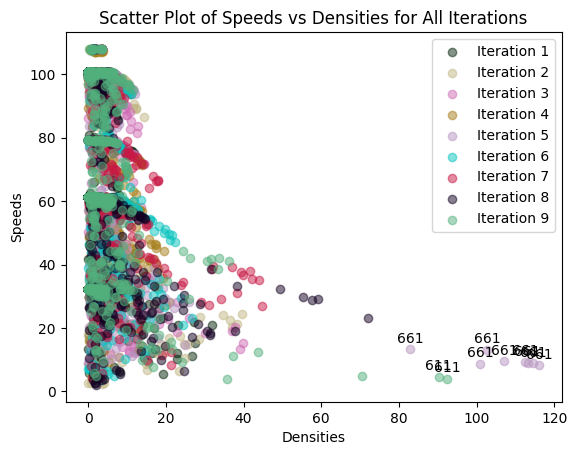

In [35]:
# 生成随机颜色
colors = np.random.rand(len(speeds_df.columns) - 1, 3)

# 绘制散点图
for i in range(len(speeds_df.columns) - 1):
    # 绘制所有点
    plt.scatter(densities_values[i::len(speeds_df.columns) - 1], speeds_values[i::len(speeds_df.columns) - 1], c=[colors[i]], marker='o', alpha=0.5, label=f'Iteration {i+1}')

# 添加标签和标题
plt.xlabel('Densities')
plt.ylabel('Speeds')
plt.title('Scatter Plot of Speeds vs Densities for All Iterations')

# 显示每个点的Id标签（只显示横轴大于80的点）
for i, txt in enumerate(id_values):
    for j in range(len(speeds_df.columns) - 1):
        if densities_values[i, j] > 80:
            plt.annotate(txt, (densities_values[i, j], speeds_values[i, j]), textcoords="offset points", xytext=(0, 5), ha='center')

# 显示图表
plt.legend()
plt.show()

# Scenario1

Select the SDUE option, Max Iterations = 15, Max Relative Gap = 0.10.
Does the simulation converge in 15 iterations according to both RGAP criteria? Which converges quicker, link times or route flows? 

In [2]:
convergence_df = pd.read_csv('Sodermalm Scenario 1 - higher demand/Sodermalm Scenario 1 - higher demand/convergence.dat', sep='\t')

In [3]:
convergence_df

,Iteration,RGAP_Linktimes,RGAP_Routeflows
0,1,2.763660,1.000000
1,2,1.281080,0.117117
2,3,0.540848,0.068185
3,4,0.456624,0.053227
4,5,0.283724,0.048266
5,6,0.186112,0.053660
6,7,0.273373,0.044986
7,8,0.266632,0.044366
8,9,0.201409,0.049100
9,10,0.166997,0.048404


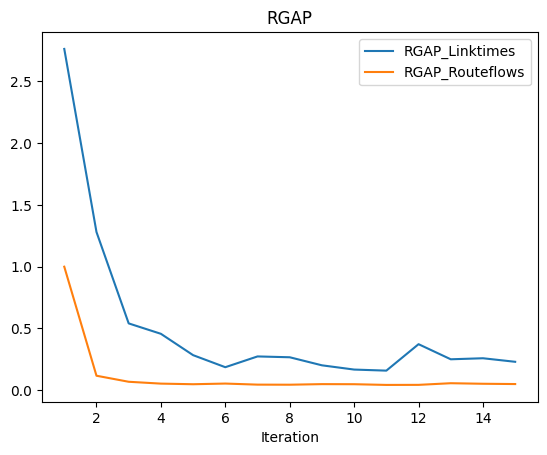

In [6]:
plt.plot(convergence_df['Iteration'],convergence_df['RGAP_Linktimes'],label='RGAP_Linktimes')
plt.plot(convergence_df['Iteration'],convergence_df['RGAP_Routeflows'],label='RGAP_Routeflows')

# 添加标签和标题
plt.xlabel('Iteration')
# plt.ylabel('Speeds')
plt.title('RGAP')

# 显示图表
plt.legend()
plt.show()

Increase the Max Relative Gap to 0.12 and Run another 15 iteration and save the results  
  
Open the density.dat, speeds.dat and flows.dat and select the 20 most congested links (based on density). Make three scatter plots: speed/density, flow/density and speed/flow based on the values for these links. What seems to be the critical density / capacity breakdown point? Hint: Group the links by free flow speed, then only make these plots for the links around Essingeleden, with the same free-flow speed.

In [7]:
speeds_df = pd.read_csv('Sodermalm Scenario 1 - higher demand/Sodermalm Scenario 1 - higher demand/output/speeds.dat', sep='\t')
densities_df = pd.read_csv('Sodermalm Scenario 1 - higher demand/Sodermalm Scenario 1 - higher demand/output/densities.dat', sep='\t')
outflows_df = pd.read_csv('Sodermalm Scenario 1 - higher demand/Sodermalm Scenario 1 - higher demand/output/outflows.dat', sep='\t')

In [11]:
# 查看列数
num_columns_speeds = speeds_df.shape[1]
num_columns_densities = densities_df.shape[1]
num_columns_outflows = outflows_df.shape[1]

print(f"Columns in speeds_df: {num_columns_speeds}")
print(f"Columns in densities_df: {num_columns_densities}")
print(f"Columns in outflows_df: {num_columns_outflows}")

Columns in speeds_df: 10
Columns in densities_df: 10
Columns in outflows_df: 10


In [12]:
# 如果你知道列的数量，可以直接使用 range
speeds_df.columns = range(num_columns_speeds)
densities_df.columns = range(num_columns_densities)
outflows_df.columns = range(num_columns_outflows)

In [14]:
densities_df

,0,1,2,3,4,5,6,7,8,9
0,1,2.516510,2.619540,2.778180,2.910970,2.892650,2.922910,2.073900,0.000000,NaN
1,2,0.145653,0.206928,0.213428,0.294241,0.195495,0.304311,0.219780,0.021669,NaN
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,4,0.000000,0.000000,0.000000,0.076628,0.087719,0.126984,0.028490,0.000000,NaN
4,5,0.511785,0.743920,0.856307,0.805340,0.850970,0.843776,0.912846,0.615079,NaN
...,...,...,...,...,...,...,...,...,...,...
1095,1096,0.000000,0.000000,0.000000,0.565667,0.516478,0.560429,0.622010,0.130276,NaN
1096,1097,0.298507,1.075950,1.125000,0.303030,0.986842,2.119570,2.598040,0.378788,NaN
1097,1098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1098,1099,6.250000,7.529760,8.365380,10.576500,10.426800,12.570800,8.845110,2.843600,NaN


sort the densiites value based on the last column, since it is the final network result.

In [21]:
# Identify the 20 most congested links based on density (using the last interation)
congested_links_densities = densities_df.sort_values(by=8, ascending=False).head(20)

congested_link_ids = congested_links_densities.index
# Extract corresponding values from speeds dataset
congested_links_speeds = speeds_df.iloc[congested_link_ids]
# Extract corresponding values from outflows dataset
congested_links_outflows = outflows_df.iloc[congested_link_ids]

这几列应该是time period，而不是iteration， 那这样的话，排序用什么排，然后出图是出一个时间变化的图？？

In [26]:
congested_links_speeds

,0,1,2,3,4,5,6,7,8,9
235,236,33.1392,4.74365,4.39673,4.40123,4.40009,4.40293,4.39825,4.40218,NaN
1056,1057,99.7909,59.70650,11.32910,9.20651,8.36320,8.92631,9.00404,9.67712,NaN
1055,1056,97.0105,90.99630,71.81300,7.08049,6.50352,6.44873,6.84550,7.65359,NaN
610,611,38.2042,5.41035,3.45414,3.95198,3.34206,3.92373,3.43065,3.43369,NaN
630,631,29.1444,9.57608,2.44827,2.06934,2.18169,2.15303,2.14328,8.59022,NaN
943,944,60.8944,59.78610,23.04140,6.09863,5.94752,5.36343,5.47663,7.83765,NaN
660,661,13.5401,9.03405,12.06140,9.21671,8.02131,9.16915,8.86495,9.21871,NaN
232,233,83.7681,92.81610,88.95130,43.35500,10.76200,10.32510,10.48190,11.16070,NaN
607,608,54.7444,51.19020,35.51810,10.21130,16.14030,10.51940,13.81730,19.70200,NaN
238,239,89.0216,91.31310,83.31700,86.37050,26.34930,22.59730,7.85709,10.66670,NaN


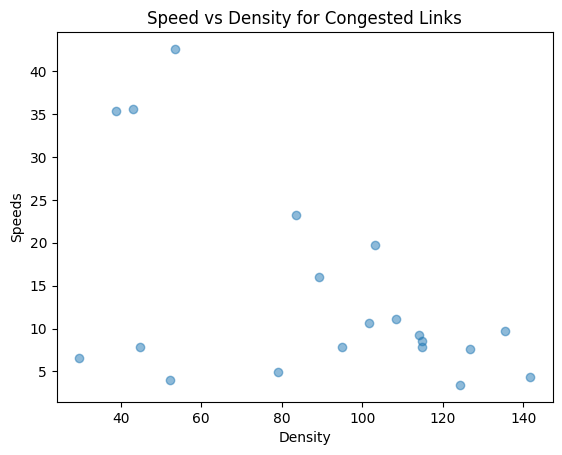

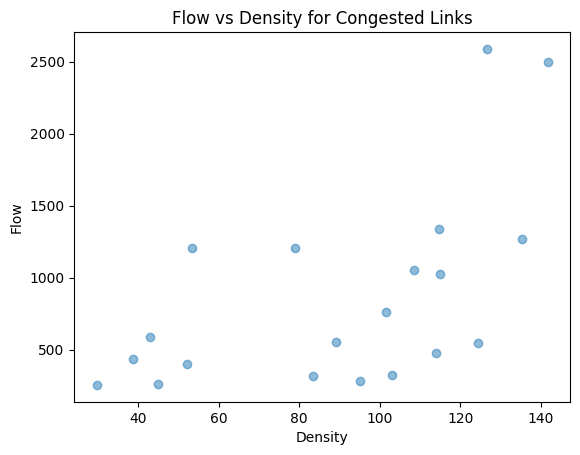

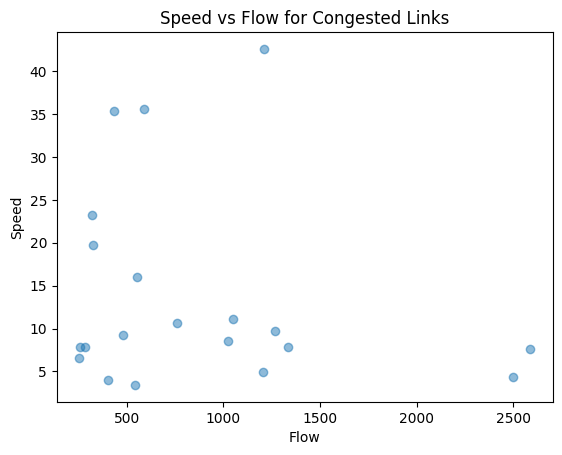

In [31]:
# Scatter plot for speed/density
plt.scatter(congested_links_densities[8], congested_links_speeds[8], alpha=0.5)
plt.xlabel('Density')
plt.ylabel('Speeds')
plt.title('Speed vs Density for Congested Links')
plt.show()

# Scatter plot for flow/density
plt.scatter(congested_links_densities[8], congested_links_outflows[8], alpha=0.5)
plt.xlabel('Density')
plt.ylabel('Flow')
plt.title('Flow vs Density for Congested Links')
plt.show()

# Scatter plot for speed/flow
plt.scatter(congested_links_outflows[8], congested_links_speeds[8], alpha=0.5)
plt.xlabel('Flow')
plt.ylabel('Speed')
plt.title('Speed vs Flow for Congested Links')
plt.show()

# Scenario 2